# The Feelings of the Crisis

When you read a news article, normally the headline is the hook to continue reading. However, a negative title could lead you to skip reading an article if you don't want to be in a bad mood. But is this accurate?

On this activity you are tasked to corroborate if a news title with a negative sentiment leads or not to a negative content. You will use VADER sentiment to accomplish this work using the news articles that you previously download on _The Voice of the Crisis_ activity.

In [25]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")


## Instructions

Just for convenience download the `vader_lexicon` in order to initialize the VADER sentiment analyzer

In [26]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Load the News Articles from the CSV File as a DataFrame

Pick the CSV file you created on _The Voice of the Crisis_ activity and load it as a DataFrame, remember to specify the `encoding='utf-8-sig'` parameter.

In [27]:
# Load news from CSV file

file_path = Path("crisis_news_en_es.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,Unnamed: 0,title,description,text,date,language
0,0,Column: U.S. gas prices soar as Europe and Asi...,U.S. gas prices have surged to the highest lev...,"LONDON, May 6 (Reuters) - U.S. gas prices have...",2022-05-06,en
1,1,‘Stardew Valley’ has sold more than 20 million...,"Six years after its initial release, Stardew V...","Six years after its initial release, Stardew V...",2022-05-14,en
2,2,Column: Crypto warnings invoke U.S. subprime b...,Regulators comparing the crypto craze to the U...,"ORLANDO, Fla., May 5 (Reuters) - Regulators co...",2022-05-05,en
3,3,The banks collapsed in 2008 – and our food sys...,Massive food producers hold too much power – a...,"For the past few years, scientists have been f...",2022-05-19,en
4,4,Breakingviews - The elusive value of past inve...,"Last week, a new business and finance library ...","LONDON, May 5 (Reuters Breakingviews) - Last w...",2022-05-05,en


The VADER sentiment module is only trained to score sentiment on English language, so create a new DataFrame only with news in English. You will learn how to score sentiment in multiple languages later.

In [28]:
# Fetch only English news
news_en_df = news_df[news_df["language"] == "en"]
news_en_df.head()

,Unnamed: 0,title,description,text,date,language
0,0,Column: U.S. gas prices soar as Europe and Asi...,U.S. gas prices have surged to the highest lev...,"LONDON, May 6 (Reuters) - U.S. gas prices have...",2022-05-06,en
1,1,‘Stardew Valley’ has sold more than 20 million...,"Six years after its initial release, Stardew V...","Six years after its initial release, Stardew V...",2022-05-14,en
2,2,Column: Crypto warnings invoke U.S. subprime b...,Regulators comparing the crypto craze to the U...,"ORLANDO, Fla., May 5 (Reuters) - Regulators co...",2022-05-05,en
3,3,The banks collapsed in 2008 – and our food sys...,Massive food producers hold too much power – a...,"For the past few years, scientists have been f...",2022-05-19,en
4,4,Breakingviews - The elusive value of past inve...,"Last week, a new business and finance library ...","LONDON, May 5 (Reuters Breakingviews) - Last w...",2022-05-05,en


### Calculating VADER Sentiment Score for News Titles and Text

As you know the `compound` score could be used to get a normalized score for a sentiment, in this section you have to create a function called `get_sentiment(score)` that will return a normalized value of sentiment for the `score` parameter based on the rules you learn. This function should return `1` for positive sentiment, `-1` for negative sentiment, and `0` for neutral sentiment.

In [29]:

def get_sentiment(df, feature):
    """
    Calculates the sentiment based on the compound score.
    """

    df = df.copy()

    analyzer = SentimentIntensityAnalyzer()

    df[f"{feature}-compound"] = df[feature].apply(lambda x: analyzer.polarity_scores(x)["compound"])

    def score(x):
        result = 0  # Neutral by default
        if x >= 0.05:  # Positive
            result = 1
        elif x <= -0.05:  # Negative
            result = -1
        return result

    df[f"{feature}-score"] = df[f"{feature}-compound"].apply(score) 

    return df[[f"{feature}-score", f"{feature}-compound"]].copy()


Use the the VADER sentiment module from `NLTK` to score the sentiment of every news article title and text in english; you should append ten new columns to the English news DataFrame to store the results as follows.

* Title's compound score
* Title's positive score
* Title's neutral score
* Title's negative score
* Title's normalized score (using the `get_sentiment()` function)
* Text's compound score
* Text's positive score
* Text's neutral score
* Text's negative score
* Text's normalized score (using the `get_sentiment()` function)

In [33]:
news_en_df_copy = news_en_df.copy()

titles = get_sentiment(news_en_df, "title")
texts = get_sentiment(news_en_df, "text")

news_en_df_copy = pd.concat([news_en_df_copy, titles,texts ], axis="columns")

news_en_df_copy.head()

,Unnamed: 0,title,description,text,date,language,title-score,title-compound,text-score,text-compound
0,0,Column: U.S. gas prices soar as Europe and Asi...,U.S. gas prices have surged to the highest lev...,"LONDON, May 6 (Reuters) - U.S. gas prices have...",2022-05-06,en,0,0.0000,-1,-0.5423
1,1,‘Stardew Valley’ has sold more than 20 million...,"Six years after its initial release, Stardew V...","Six years after its initial release, Stardew V...",2022-05-14,en,0,0.0000,1,0.3400
2,2,Column: Crypto warnings invoke U.S. subprime b...,Regulators comparing the crypto craze to the U...,"ORLANDO, Fla., May 5 (Reuters) - Regulators co...",2022-05-05,en,-1,-0.2960,1,0.1154
3,3,The banks collapsed in 2008 – and our food sys...,Massive food producers hold too much power – a...,"For the past few years, scientists have been f...",2022-05-19,en,-1,-0.2732,-1,-0.5423
4,4,Breakingviews - The elusive value of past inve...,"Last week, a new business and finance library ...","LONDON, May 5 (Reuters Breakingviews) - Last w...",2022-05-05,en,0,-0.0258,-1,-0.3612


### Analyzing Sentiments Results

How the sentiment of the title and the text differs on news articles?

To answer this question, on this section you will create a bar chart contrasting the normalized sentiment for the title and the text of each news article. Use the build-in `plot()` method of the Pandas DataFrame to create a bar chart like the one bellow. Be aware that you chart might differ from this one due to is made from a different news DataFrame.

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparison'}>

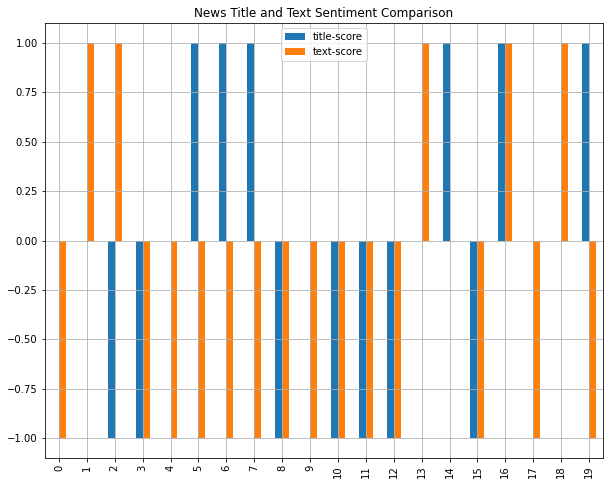

In [36]:
news_en_df_copy.plot(
    y=["title-score", "text-score"],
    kind="bar",
    title="News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)


Finally get the descriptive statistics from the English news DataFrame and discuss the analysis results with your partners.